In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import pandas as pd
import subprocess

In [2]:
import sys
import time
import os
import glob
import numpy
import math
from scipy.fftpack import fft
from scipy.fftpack.realtransforms import dct
from scipy.signal import lfilter, hamming

In [3]:
from ctc.code.utilities.features import *

In [4]:
files = [f for f in os.listdir('./wav') if os.path.isfile(os.path.join("wav", f))]
for f in files:
    print(f)

16a02Lb.wav
14a07Wc.wav
10a07Ad.wav
13a05Ea.wav
14a05Wa.wav
14a07Na.wav
15a05Wa.wav
16b10Wb.wav
09a01Nb.wav
16a01Fc.wav
14a04Ed.wav
11a01Ab.wav
09b02Na.wav
03a05Nd.wav
10a01Ac.wav
16a04Ab.wav
15b02Nd.wav
16b09Wb.wav
11a01Ld.wav
08a01Wa.wav
09b02Wc.wav
12b09Td.wav
10b02Aa.wav
16a04Tc.wav
16b01La.wav
13b01Wa.wav
12b01Wa.wav
13b03Na.wav
12a02Wc.wav
16b03Ad.wav
13b03Wc.wav
13b01Nc.wav
15a02Ea.wav
11a05Td.wav
14a02Ea.wav
09b03Ed.wav
13a02Wa.wav
16b03La.wav
12a02Wa.wav
13b10La.wav
03b02Wb.wav
13a02Nc.wav
16b01Lc.wav
16b10Wa.wav
15b01Ec.wav
14a05Wb.wav
14b02Wd.wav
08a01Na.wav
08a01Wc.wav
11a01Aa.wav
08b02Nb.wav
13b09La.wav
09a01Wb.wav
11b02Ab.wav
15a07Nc.wav
14b01Eb.wav
11a05Ad.wav
03a01Nc.wav
12a02Nb.wav
11a05Lc.wav
15a05Na.wav
03a01Wa.wav
14a05Na.wav
09a07Wd.wav
10a07La.wav
03b02Na.wav
09a02Ea.wav
14b03Ed.wav
12b10Ld.wav
09a05Wb.wav
16b01Aa.wav
11a02Fb.wav
12b10Ac.wav
15b02Wa.wav
14b09Fc.wav
09b02Wd.wav
10a04Fd.wav
10b02La.wav
03a05Wa.wav
11a04Fd.wav
14a01Na.wav
08b02Wd.wav
12b02Ea.wav
13b0

In [5]:
len(files)

535

In [6]:
berlin=[]
emo_dict={"W":"Anger","L":"Boredom","E":"Disgust","A":"Anxisty/Fear","F":"Happiness","T":"Sadness","N":"Neutral"}
for i,f in enumerate(files):
    samplerate, data = wavfile.read(os.path.join("./wav",f))
    wavfile.read("input_file.wav",samplerate,data)
    command = "SMILExtract -C opensmile_script.conf -I +input_file.wav -O output_file.csv"
    output= subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    emo=emo_dict[f[5]]
    speaker=f[:2]
    sentence=f[2:5]
    version=f[6]
    data=pd.read_csv("output_file.csv",sep=";")
    tp=(data,emo,speaker,sentence,version,samplerate)
    berlin.append(tp)
    
    
    

/Users/andre/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [9]:
(data,emo,speaker,sentence,version,samplerate)=berlin[55]

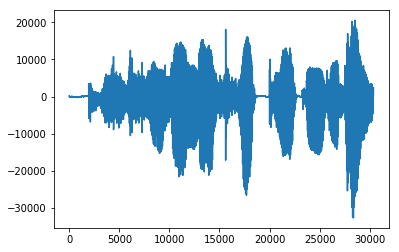

In [10]:
plt.plot(data[:30372])

In [13]:
pickle_in = open("berlin.pickle","rb")
example_dict = pickle.load(pickle_in)

In [12]:
import pickle

In [23]:
example_dict[532][0]

,frameIndex,frameTime,pcm_LOGenergy
0,0,0.00,-7.401938
1,1,0.01,-9.180839
2,2,0.02,-9.358557
3,3,0.03,-9.717574
4,4,0.04,-11.058660
5,5,0.05,-10.000230
6,6,0.06,-9.523736
7,7,0.07,-8.211567
8,8,0.08,-8.067695
9,9,0.09,-7.421975
